## kmeans clustering

## hirarchical clustering

## dbscan clustering

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [2]:
from sklearn.cluster import KMeans
X = np.array([[1, 2], [1, 4], [1, 0],[10, 2], [10, 4], [10, 0],[100,110],[1000,1200]])

In [3]:
X.dtype

dtype('int32')

In [4]:
X

array([[   1,    2],
       [   1,    4],
       [   1,    0],
       [  10,    2],
       [  10,    4],
       [  10,    0],
       [ 100,  110],
       [1000, 1200]])

In [5]:
kmeans = KMeans(n_clusters=4)

In [6]:
kmeans.fit(X)

KMeans(n_clusters=4)

In [7]:
kmeans.labels_

array([0, 0, 0, 3, 3, 3, 2, 1])

In [8]:
data=pd.DataFrame(X)


In [9]:
data

,0,1
0,1,2
1,1,4
2,1,0
3,10,2
4,10,4
5,10,0
6,100,110
7,1000,1200


In [10]:
labels=pd.DataFrame(kmeans.labels_)

In [11]:
datawithlabel=pd.concat([data,labels],axis=1)


In [12]:
datawithlabel

,0,1,0
0,1,2,0
1,1,4,0
2,1,0,0
3,10,2,3
4,10,4,3
5,10,0,3
6,100,110,2
7,1000,1200,1


In [13]:
np.array([[0, 0], [12, 3]])


array([[ 0,  0],
       [12,  3]])

In [14]:
kmeans.predict([[0, 0], [12, 3]])


array([0, 3])

In [15]:
kmeans.cluster_centers_


array([[1.0e+00, 2.0e+00],
       [1.0e+03, 1.2e+03],
       [1.0e+02, 1.1e+02],
       [1.0e+01, 2.0e+00]])

In [16]:
X,y=make_blobs(n_samples=1000,centers=3,n_features=2,random_state=10)


In [17]:
X

array([[ 4.56889035, -9.9492391 ],
       [ 2.35388502,  3.51466401],
       [-0.01750156, -6.05038477],
       ...,
       [ 4.89123569,  4.86995972],
       [ 1.09272697,  4.04641343],
       [ 0.97077866, -4.8289551 ]])

In [18]:
y

array([0, 1, 2, 2, 1, 2, 2, 2, 2, 2, 0, 1, 0, 0, 2, 2, 2, 0, 0, 0, 2, 0,
       2, 2, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 2, 1, 1,
       0, 1, 2, 2, 0, 0, 0, 2, 1, 2, 1, 2, 2, 0, 1, 1, 2, 2, 0, 1, 2, 0,
       1, 0, 1, 1, 1, 2, 2, 0, 2, 2, 0, 0, 0, 2, 2, 2, 1, 2, 1, 0, 1, 2,
       2, 1, 1, 0, 0, 1, 2, 0, 1, 0, 0, 1, 1, 2, 1, 1, 2, 0, 2, 1, 0, 2,
       2, 1, 0, 1, 2, 0, 1, 2, 2, 1, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1, 1, 2,
       1, 2, 2, 2, 2, 0, 2, 2, 0, 1, 2, 0, 1, 0, 2, 1, 1, 2, 1, 0, 0, 2,
       2, 1, 2, 2, 1, 2, 1, 2, 0, 0, 1, 1, 1, 1, 0, 2, 1, 2, 2, 2, 0, 0,
       2, 0, 0, 0, 2, 2, 0, 2, 1, 1, 2, 2, 2, 1, 2, 2, 0, 0, 1, 0, 1, 1,
       2, 2, 2, 0, 1, 2, 0, 0, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 0, 0, 1, 2,
       1, 2, 0, 0, 2, 1, 2, 1, 0, 2, 1, 0, 1, 0, 2, 2, 0, 1, 2, 2, 1, 2,
       1, 0, 0, 1, 2, 2, 2, 1, 2, 1, 0, 1, 1, 1, 1, 2, 1, 1, 0, 0, 1, 2,
       1, 0, 2, 0, 1, 0, 0, 1, 2, 0, 2, 0, 1, 1, 0, 0, 0, 1, 2, 1, 1, 0,
       0, 0, 0, 2, 2, 1, 1, 1, 2, 1, 2, 0, 0, 2, 2,

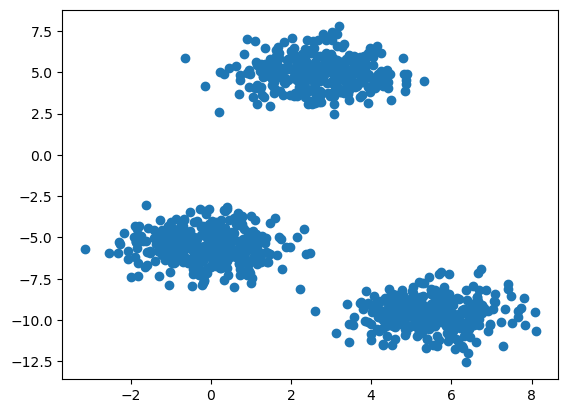

In [20]:
plt.scatter(X[:,0],X[:,1])


In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=20)

In [23]:
wcss=[]
for k in range(2,11):
    kmean=KMeans(n_clusters=k,init="k-means++")
    kmean.fit(X_train)
    wcss.append(kmean.inertia_)

In [24]:
wcss

[6350.499237030179,
 1230.8405264123776,
 1079.8137161527345,
 942.8135032509224,
 812.1609830987286,
 703.6307777493805,
 606.8883053466024,
 528.7607708404452,
 488.57653598142247]

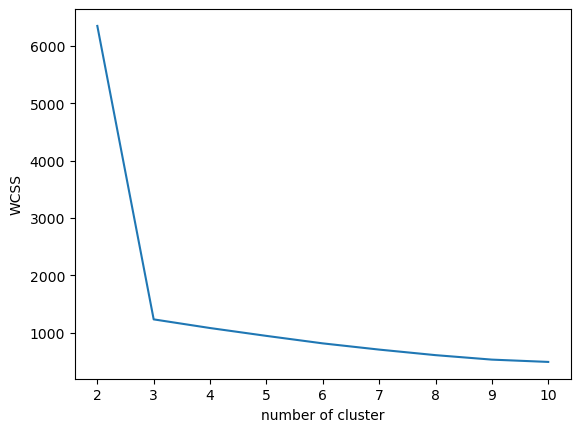

In [25]:
plt.plot(range(2,11),wcss)
plt.xticks(range(2,11))
plt.xlabel("number of cluster")
plt.ylabel("WCSS")
plt.show()

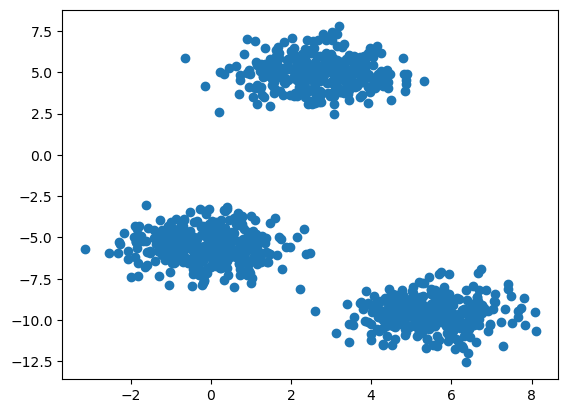

In [26]:
plt.scatter(X[:,0],X[:,1])


In [27]:
kmeans=KMeans(n_clusters=3,init="k-means++")


In [28]:
y_lables=kmeans.fit_predict(X_train)


In [29]:
y_lables


array([1, 2, 1, 2, 1, 1, 2, 0, 2, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 2, 0,
       2, 2, 0, 2, 0, 1, 2, 0, 1, 1, 0, 0, 0, 2, 2, 0, 2, 1, 2, 2, 0, 2,
       0, 2, 2, 1, 0, 1, 0, 0, 1, 0, 1, 1, 2, 1, 0, 1, 2, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 2, 0, 1, 1, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 0, 1, 2, 0,
       2, 1, 2, 2, 2, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 2, 2, 1, 0, 2, 2,
       2, 1, 0, 1, 0, 2, 1, 1, 0, 0, 1, 1, 1, 2, 2, 1, 1, 0, 1, 1, 0, 1,
       1, 2, 2, 1, 2, 1, 2, 0, 2, 2, 0, 2, 2, 2, 1, 0, 2, 0, 2, 0, 0, 1,
       2, 2, 2, 0, 0, 0, 2, 0, 2, 1, 2, 0, 2, 2, 0, 1, 0, 0, 1, 0, 1, 0,
       2, 2, 2, 0, 0, 1, 1, 0, 1, 0, 1, 2, 2, 2, 1, 2, 1, 0, 0, 0, 1, 0,
       2, 0, 0, 1, 0, 0, 0, 1, 2, 2, 1, 0, 2, 0, 0, 0, 2, 1, 1, 2, 2, 2,
       1, 2, 2, 1, 1, 0, 0, 1, 2, 0, 1, 1, 1, 0, 2, 1, 1, 0, 2, 1, 0, 1,
       2, 2, 2, 0, 0, 2, 0, 2, 1, 0, 2, 0, 1, 0, 2, 0, 1, 1, 2, 0, 0, 0,
       2, 2, 0, 0, 2, 0, 2, 1, 0, 0, 1, 1, 2, 0, 0, 0, 0, 1, 1, 2, 0, 0,
       1, 1, 0, 1, 2, 2, 1, 0, 0, 2, 1, 2, 0, 2, 1,

In [30]:
y_train


array([2, 0, 2, 0, 2, 2, 0, 1, 0, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 0, 1,
       0, 0, 1, 0, 1, 2, 0, 1, 2, 2, 1, 1, 1, 0, 0, 1, 0, 2, 0, 0, 1, 0,
       1, 0, 0, 2, 1, 2, 1, 1, 2, 1, 2, 2, 0, 2, 1, 2, 0, 1, 2, 1, 1, 2,
       2, 2, 1, 2, 0, 1, 2, 2, 2, 0, 0, 0, 0, 0, 2, 2, 0, 0, 1, 2, 0, 1,
       0, 2, 0, 0, 0, 2, 2, 1, 1, 1, 1, 1, 2, 2, 1, 2, 0, 0, 2, 1, 0, 0,
       0, 2, 1, 2, 1, 0, 2, 2, 1, 1, 2, 2, 2, 0, 0, 2, 2, 1, 2, 2, 1, 2,
       2, 0, 0, 2, 0, 2, 0, 1, 0, 0, 1, 0, 0, 0, 2, 1, 0, 1, 0, 1, 1, 2,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 2, 0, 1, 0, 0, 1, 2, 1, 1, 2, 1, 2, 1,
       0, 0, 0, 1, 1, 2, 2, 1, 2, 1, 2, 0, 0, 0, 2, 0, 2, 1, 1, 1, 2, 1,
       0, 1, 1, 2, 1, 1, 1, 2, 0, 0, 2, 1, 0, 1, 1, 1, 0, 2, 2, 0, 0, 0,
       2, 0, 0, 2, 2, 1, 1, 2, 0, 1, 2, 2, 2, 1, 0, 2, 2, 1, 0, 2, 1, 2,
       0, 0, 0, 1, 1, 0, 1, 0, 2, 1, 0, 1, 2, 1, 0, 1, 2, 2, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 2, 1, 1, 2, 2, 0, 1, 1, 1, 1, 2, 2, 0, 1, 1,
       2, 2, 1, 2, 0, 0, 2, 1, 1, 0, 2, 0, 1, 0, 2,

In [31]:
X_train[:,0]

array([-1.41832204e+00,  4.48697951e+00,  2.24704936e-01,  5.02494005e+00,
       -1.20566991e+00, -2.40528658e-01,  4.53522594e+00,  3.24289824e+00,
        6.37353894e+00,  3.51963962e+00,  9.40643276e-01,  3.33435966e+00,
       -1.84803616e+00,  2.79746994e-01, -1.66299054e-01,  9.88739486e-01,
        1.10858193e+00, -6.71428928e-01,  3.03222019e+00, -1.88949319e-01,
        5.37758235e+00,  3.97323375e+00,  6.51163994e+00,  5.26001217e+00,
        3.87259410e+00,  5.29579194e+00,  2.93975071e+00, -1.42179319e+00,
        4.34083423e+00,  2.43172588e+00, -9.12224291e-01, -1.78309239e+00,
        3.39546910e+00,  3.44338367e+00,  1.55855578e+00,  5.45250939e+00,
        7.83073847e+00,  6.23354172e-01,  6.40648699e+00,  8.18809420e-01,
        6.70146197e+00,  3.83803205e+00,  2.66513548e+00,  4.98738663e+00,
        1.24625586e+00,  6.34773330e+00,  5.61898570e+00, -1.03617272e+00,
        3.71294266e+00,  9.25618971e-01,  3.17537051e+00,  4.87785040e+00,
        1.25485940e-01,  

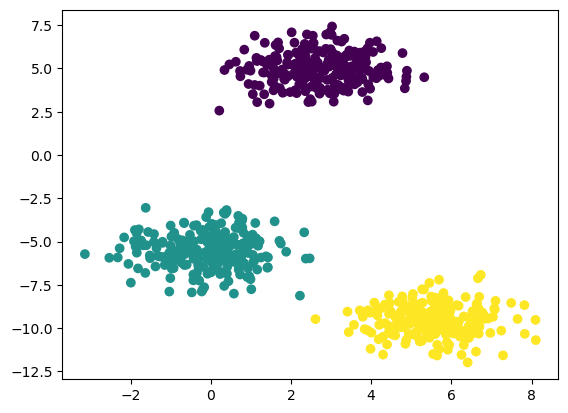

In [32]:
plt.scatter(X_train[:,0],X_train[:,1],c=y_lables)


In [33]:
wcss


[6350.499237030179,
 1230.8405264123776,
 1079.8137161527345,
 942.8135032509224,
 812.1609830987286,
 703.6307777493805,
 606.8883053466024,
 528.7607708404452,
 488.57653598142247]

In [36]:
pip install kneed

In [37]:
from kneed import KneeLocator


In [38]:
k=KneeLocator(range(2,11),wcss,curve='convex',direction='decreasing')

In [40]:
k.elbow


3

In [41]:
from sklearn.metrics import silhouette_score


In [42]:
from sklearn.cluster import KMeans
silhouette_coefficients=[]
for k in range(2,11):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(X_train)
    score=silhouette_score(X_train,kmeans.labels_)
    silhouette_coefficients.append(score)

In [43]:
silhouette_coefficients


[0.7273220153669463,
 0.7835543034796946,
 0.6291852556425147,
 0.446650214633054,
 0.31411304074247554,
 0.3337657046092602,
 0.3415021148330088,
 0.3467238486806044,
 0.34561976588158383]

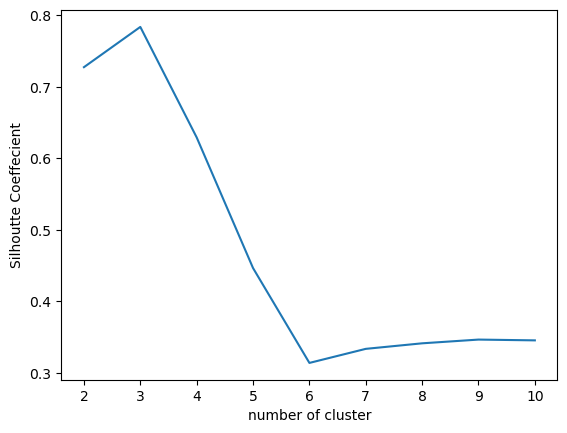

In [44]:
plt.plot(range(2,11),silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel("number of cluster")
plt.ylabel("Silhoutte Coeffecient")
plt.show()